# **Recurrent Neural Networks (RNN) with TensorFlow**

### **Introduction**

Recurrent Neural Networks (RNNs) are designed to handle sequential data by maintaining an internal state to process sequences of inputs. This internal state allows RNNs to learn temporal dependencies and relationships in data such as time series or text.

In TensorFlow's Keras API, RNNs can be implemented using layers like SimpleRNN, LSTM, and GRU. These layers abstract away the complex internals of RNNs and provide easy-to-use interfaces for building sequential models.

### **Importing Libraries**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Loading and preparaing the dataset**

Loading the MNIST dataset, which consists of images of handwritten digits. Normalizing pixel values to the range [0, 1].

In [2]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

### **Defining Model Building Function**

In [3]:
def build_and_compile_model(rnn_type='lstm', allow_cudnn_kernel=True):
    model = keras.models.Sequential()
    
    if rnn_type == 'lstm': rnn_layer = layers.LSTM(64, input_shape=(28, 28))
    elif rnn_type == 'gru': rnn_layer = layers.GRU(64, input_shape=(28, 28))
    elif rnn_type == 'cudnn':
        if allow_cudnn_kernel:
            rnn_layer = layers.LSTM(64, input_shape=(28, 28))
        else:
            rnn_layer = layers.RNN(layers.LSTMCell(64), input_shape=(28, 28))
    else:
        raise ValueError("Invalid rnn_type. Choose 'lstm', 'gru', or 'cudnn'.")
    
    model.add(rnn_layer)
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(10))
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer='sgd', metrics=['accuracy'])
    return model

### **Train and evaluate the model Function**

In [4]:
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test, epochs=5):
    history = model.fit(x_train, y_train,validation_data=(x_test, y_test),batch_size=64,epochs=epochs)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
    return history, test_loss, test_accuracy

### **Plot training history Function**

In [5]:
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'])
    plt.grid()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'])
    plt.grid()
    
    plt.show()

### **Plotting Predictions Function**

In [6]:
def plot_predictions(model, x_test, y_test, num_examples=5):
    predictions = model.predict(x_test[:num_examples])
    predictions = np.argmax(predictions, axis=1)
    
    plt.figure(figsize=(10, 2))
    for i in range(num_examples):
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(x_test[i], cmap='gray')
        plt.title(f'Pred: {predictions[i]}\nTrue: {y_test[i]}')
        plt.axis('off')
    plt.show()

### **LSTM Model Testing**

In [7]:
# LSTM Model
print("Training LSTM model...")
lstm_model = build_and_compile_model(rnn_type='lstm')
lstm_history, lstm_test_loss, lstm_test_accuracy = train_and_evaluate_model(lstm_model, x_train, y_train, x_test, y_test)

Training LSTM model...


Epoch 1/5


938/938 [==============================] - 16s 15ms/step - loss: 0.9353 - accuracy: 0.7043 - val_loss: 0.6290 - val_accuracy: 0.7858
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.3748 - accuracy: 0.8885 - val_loss: 0.3455 - val_accuracy: 0.8914
Epoch 3/5
938/938 [==============================] - 13s 13ms/step - loss: 0.2469 - accuracy: 0.9266 - val_loss: 0.2913 - val_accuracy: 0.9031
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 0.1941 - accuracy: 0.9420 - val_loss: 0.2384 - val_accuracy: 0.9224
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 0.1650 - accuracy: 0.9499 - val_loss: 0.2964 - val_accuracy: 0.8999
313/313 - 2s - loss: 0.2964 - accuracy: 0.8999 - 2s/epoch - 6ms/step


LSTM - Test accuracy: 0.8999, Test loss: 0.2964


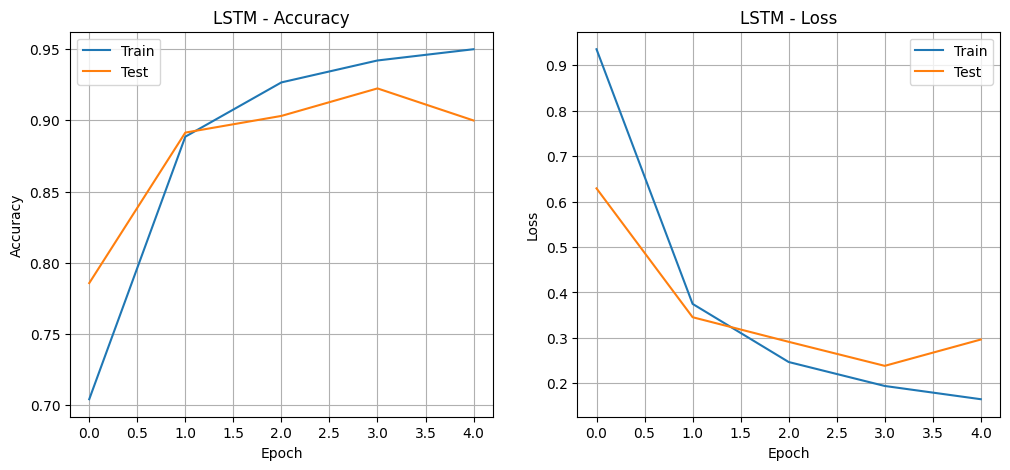

In [8]:
print(f"LSTM - Test accuracy: {lstm_test_accuracy:.4f}, Test loss: {lstm_test_loss:.4f}")
plot_history(lstm_history, 'LSTM')

1/1 [==============================] - 1s 692ms/step


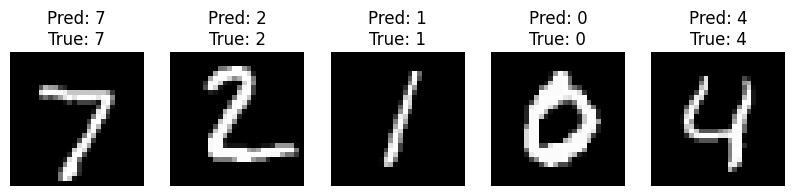

In [9]:
plot_predictions(lstm_model, x_test, y_test, num_examples=5)

### **GRU Model Testing**

In [10]:
# GRU Model
print("Training GRU model...")
gru_model = build_and_compile_model(rnn_type='gru')
gru_history, gru_test_loss, gru_test_accuracy = train_and_evaluate_model(gru_model, x_train, y_train, x_test, y_test)

Training GRU model...
Epoch 1/5
938/938 [==============================] - 14s 12ms/step - loss: 1.4113 - accuracy: 0.5250 - val_loss: 1.0625 - val_accuracy: 0.6367
Epoch 2/5
938/938 [==============================] - 11s 12ms/step - loss: 0.7863 - accuracy: 0.7460 - val_loss: 0.6064 - val_accuracy: 0.8052
Epoch 3/5
938/938 [==============================] - 10s 11ms/step - loss: 0.5266 - accuracy: 0.8334 - val_loss: 0.4138 - val_accuracy: 0.8666
Epoch 4/5
938/938 [==============================] - 12s 12ms/step - loss: 0.3894 - accuracy: 0.8795 - val_loss: 0.3344 - val_accuracy: 0.8932
Epoch 5/5
938/938 [==============================] - 11s 12ms/step - loss: 0.3171 - accuracy: 0.9036 - val_loss: 0.2556 - val_accuracy: 0.9226
313/313 - 1s - loss: 0.2556 - accuracy: 0.9226 - 974ms/epoch - 3ms/step


GRU - Test accuracy: 0.9226, Test loss: 0.2556


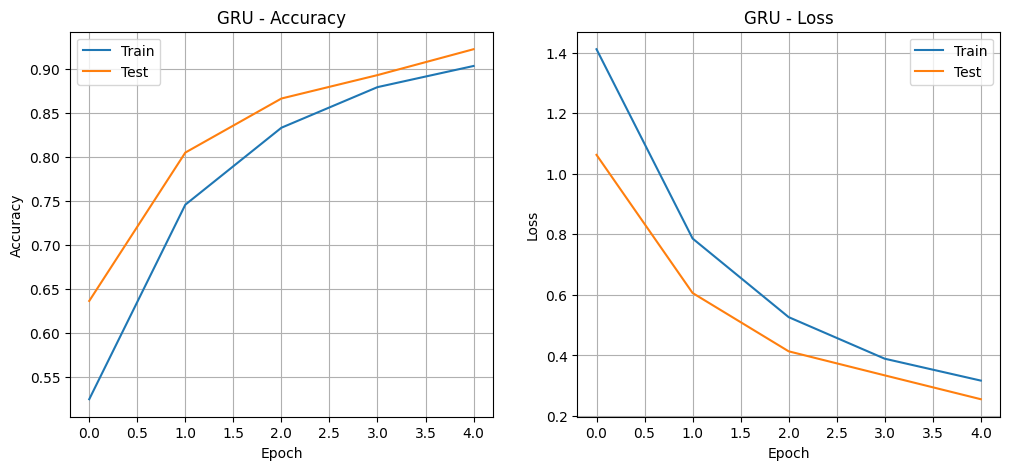

In [11]:
print(f"GRU - Test accuracy: {gru_test_accuracy:.4f}, Test loss: {gru_test_loss:.4f}")
plot_history(gru_history, 'GRU')

1/1 [==============================] - 0s 402ms/step


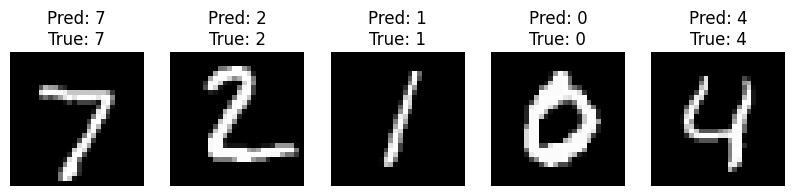

In [12]:
plot_predictions(gru_model, x_test, y_test, num_examples=5)

### **CuDNN LSTM Model Testing**

In [13]:
# CuDNN LSTM Model
print("Training CuDNN LSTM model...")
cudnn_model = build_and_compile_model(rnn_type='cudnn')
cudnn_history, cudnn_test_loss, cudnn_test_accuracy = train_and_evaluate_model(cudnn_model, x_train, y_train, x_test, y_test)

Training CuDNN LSTM model...
Epoch 1/5
938/938 [==============================] - 13s 12ms/step - loss: 0.9527 - accuracy: 0.6970 - val_loss: 0.5097 - val_accuracy: 0.8444
Epoch 2/5
938/938 [==============================] - 11s 12ms/step - loss: 0.3594 - accuracy: 0.8941 - val_loss: 0.2682 - val_accuracy: 0.9160
Epoch 3/5
938/938 [==============================] - 11s 11ms/step - loss: 0.2412 - accuracy: 0.9280 - val_loss: 0.2897 - val_accuracy: 0.9001
Epoch 4/5
938/938 [==============================] - 11s 11ms/step - loss: 0.1942 - accuracy: 0.9417 - val_loss: 0.2039 - val_accuracy: 0.9368
Epoch 5/5
938/938 [==============================] - 11s 12ms/step - loss: 0.1644 - accuracy: 0.9501 - val_loss: 0.1944 - val_accuracy: 0.9353
313/313 - 1s - loss: 0.1944 - accuracy: 0.9353 - 1s/epoch - 4ms/step


CuDNN LSTM - Test accuracy: 0.9353, Test loss: 0.1944


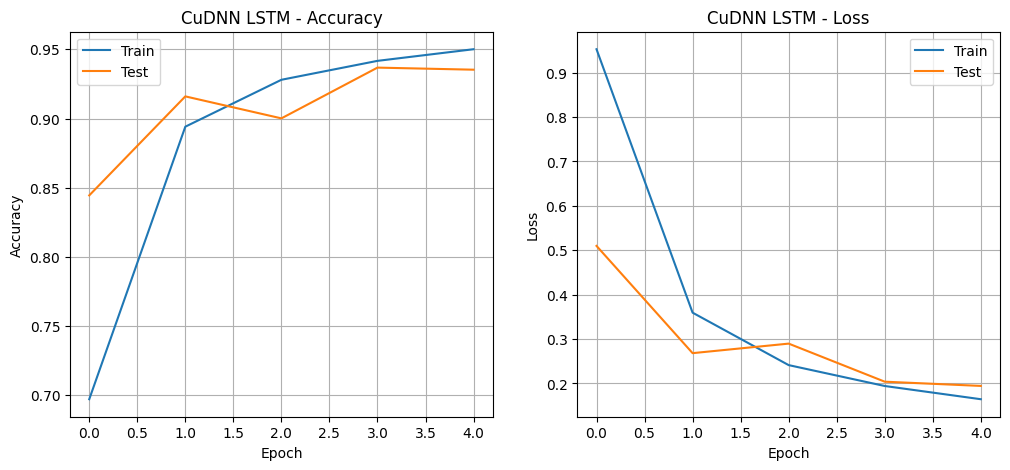

In [14]:
print(f"CuDNN LSTM - Test accuracy: {cudnn_test_accuracy:.4f}, Test loss: {cudnn_test_loss:.4f}")
plot_history(cudnn_history, 'CuDNN LSTM')

1/1 [==============================] - 0s 381ms/step


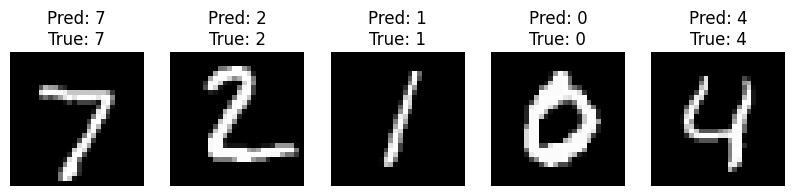

In [15]:
plot_predictions(cudnn_model, x_test, y_test, num_examples=5)

In [16]:
# Print out the final comparison of model performances
print("Final Comparison of Models:")
print(f"LSTM - Test accuracy: {lstm_test_accuracy:.4f}, Test loss: {lstm_test_loss:.4f}")
print(f"GRU - Test accuracy: {gru_test_accuracy:.4f}, Test loss: {gru_test_loss:.4f}")
print(f"CuDNN LSTM - Test accuracy: {cudnn_test_accuracy:.4f}, Test loss: {cudnn_test_loss:.4f}")

Final Comparison of Models:
LSTM - Test accuracy: 0.8999, Test loss: 0.2964
GRU - Test accuracy: 0.9226, Test loss: 0.2556
CuDNN LSTM - Test accuracy: 0.9353, Test loss: 0.1944
